Nombre del estudiante: Manuel Guerrero Moñús.

![](https://informatica.ucm.es/themes/ucm16/media/img/logo.png)

# Máster en Ingeniería Informática


### SGDI - Práctica 1

Los objetivos de esta práctica son:

- Manejar las técnicas de web scraping con selenium
- Manejo básico de los dataframes de pandas; preprocesamiento
- Aplicación de tests estadísticos
- Interpretación de resultados

Cambiar el path a dónde se encuentra el Chrome Driver y ejecutar las dos cajas siguientes. Como resultado, debemos ver como se iniciar un Chrome sin cargar ninguna página

In [1]:
chromedriver = "/home/manuelgms/Descargas/chromedriver"

In [2]:
# Ahora arrancamos una instancia de google Chrome. 
%matplotlib inline
import os
import time
 

from selenium import webdriver  # si da error, desde anaconda prompt sobre python 3.x hacer pip install --user  selenium
os.environ["webdriver.chrome.driver"] = chromedriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
driver = webdriver.Chrome(executable_path=chromedriver,options=chrome_options)

En esta prácticaexaminaremos datos económicos, en particular la evolución de la renta per cápita en comunidades  autónomas como en este ejemplo https://datosmacro.expansion.com/pib/espana-comunidades-autonomas?anio=1999. En particular nos vamos a fijar en la pestaña "PIB per capita" y en esa página en la columna CCAA, que incluye el nombre de la comunidad (al que se añade un molesto "[+]") y en la columna PIB per capita que incluye el valor numérico de esa comunidad en ese año.

Observad que al final de la URL viene el año, nosotros iremos cambiando el año para recopilar los datos de diferentes ejercicios y poder ver la evolución.

#### Ejercicio 1 [0.25 puntos]
Los datos en la página vienen con un formato que no nos resulta nada conveniente, como por ejemplo

    10.600€
    
Nosotros queremos comvertir este valor en 10600. Escribir una función formatea que reciba un string con 
este formato, quite el valor € y el punto decimal, y devuelva  el resultado convertido a entero  


In [3]:
# quitar los cometarios de las 2 lineas de abajo y completar la definición de la función
def formatea(s):
    return int("".join([letra for letra in s if not(letra == "€" or letra == ".")]))

Para probar

In [4]:
print(formatea("10.600€")) # debe mostrar 10600

print(formatea("800€")) # debe mostrar 800

10600
800


#### Ejercicio 2 [3 puntos]
Lo que queremos hacer ahora es:
    
    1.- Abrir la página https://datosmacro.expansion.com/pib/espana-comunidades-autonomas?anio=xxxx, donde xxxx irá tomando todos los valores desde 1995 hasta 2019, ambos incluidos (la lista de años está en la variable `anio`, declarada en el bloque siguiente)
    
    2.- Seleccionar el tabulador correspondiente al 'PIB per capita'. 
    
    3.- Dentro de la página, y para cada comunidad de la lista `comunidades`, queremos guardar la renta per capita de esa comunidad. Buscar alguna estructura de datos que permita recopilar todos los datos (una lista de listas, por ejemplo)
    
    4.- Mostrar el resultado al final, es decir mostrar la estructura completa para ver si se han cargado bien los datos
    
Nota1: el código sigue teniendo que funcionar si cambiamos (modificamos, añadimos, quitamos) las comunidades o los años
    
Nota 2: Tras cargar la página y  tras seleccionar la pestaña se puede añadir una instrucción `time.sleep(3)` para dar tiempo a que se cargue. ESto es lento, poco seguro y nada elegante, quién quiera puede mirar otras   [soluciones](https://stackoverflow.com/questions/37787453/selenium-python-how-to-wait-for-a-page-to-load-after-a-click) 
  pero no es obligado.

In [5]:
# comunidades a recopilar
comunidades = ['Madrid', 'Navarra', 'Andalucía', 'Cataluña', 'País Vasco', 'La Rioja', 'Aragón', 'Galicia' ]
# años a investigar
anio = list(range(1995,2020))


In [6]:
# escribir aquí el código

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Ruta al binario chromedriver.
chromedriver = "/home/manuelgms/Descargas/chromedriver"

# Configuramos y obtenemos una isntancia del navegador Google Chrome.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox') # Ejecutar chromedriver como root.
browser = webdriver.Chrome(executable_path=chromedriver, options=chrome_options)

# Crearemos un diccionario de listas ara generar más adelante un DataFrame.
comunidadRentas = dict()  
comunidadRentas['Año'] = []
for comunidad in comunidades:
    comunidadRentas[comunidad] = []

# Recorremos el vector de años.
for year in anio:
    
    # Completamos la columna que servirá de índice en el DataFrame.
    comunidadRentas['Año'].append(year)

    # Cargamos la página web.
    browser.get("https://datosmacro.expansion.com/pib/espana-comunidades-autonomas?anio=" + str(year))

    # Capturamos y pulsamos el boton 'PIB per capita'.
    WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.ID, "tabgdpapc"))).click()
    
    # Cargamos toda la columna con los nombres de las comunidades en una lista.
    listaComunidades = WebDriverWait(browser, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//table[@id='tbPC']/tbody/tr/td/a")))
    
    # Cargamos toda la columna con el PIB de las comunidades en una lista.
    listaPresupuestos = WebDriverWait(browser, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//table[@id='tbPC']/tbody/tr/td[3]")))

    for i in range(len(listaComunidades)):
        
        # Cargamos la comunidad y la renta.
        comunidad = listaComunidades[i].get_property("innerText").replace("[+]","").rstrip()
        renta = formatea(listaPresupuestos[i].get_property("innerText"))

        # Si es una comunidad que nos interesa.
        if comunidad in comunidades:
            
            # Añadimos a la comunidad la renta de ese año. 
            comunidadRentas[comunidad].append(renta)

# Mostramos los datos recolectados.
for comunidad, rentas in comunidadRentas.items():
    print("{:_<10}".format(comunidad), end=':')
    for renta in rentas:
        print(" {:_<5}".format(renta), end="")
    print()

Año_______: 1995_ 1996_ 1997_ 1998_ 1999_ 2000_ 2001_ 2002_ 2003_ 2004_ 2005_ 2006_ 2007_ 2008_ 2009_ 2010_ 2011_ 2012_ 2013_ 2014_ 2015_ 2016_ 2017_ 2018_ 2019_
Madrid____: 15100 16300 16800 18200 19700 21333 23049 24023 25053 26439 28036 30124 31490 32025 31220 30879 30966 30349 30131 30574 31907 32840 34041 35041 35876
Navarra___: 14600 15800 16300 17100 18300 20287 21506 22611 23633 24891 26394 27925 29136 29772 28402 28306 28097 27030 27060 27524 28520 29375 30508 31389 32692
Andalucía_: 8600_ 9200_ 9500_ 9900_ 10600 11823 12764 13574 14537 15491 16477 17483 18382 18513 17573 17434 17167 16462 16221 16413 17235 17659 18501 19107 19658
Cataluña__: 14100 15300 15700 16400 17700 19383 20953 21877 22818 23938 25116 26708 27983 28157 26874 26976 26507 25806 25795 26403 27630 28680 29722 30426 31110
País Vasco: 13800 14700 15200 16400 17800 19542 20934 22051 23165 24540 26245 28225 29883 30819 29364 29655 29364 28697 28387 28946 30046 31004 32167 33223 34273
La Rioja__: 13300 14100 1460

#### Ejercicio 3 [1 punto]
Ahora queremos pasar estos datos a un Dataframe de pandas para hacer algún cálculo sencillo.

Crear un dataframe de Pandas con nombre `df` que tenga como columnas, las comunidades autónomas y como índices los años (y como contenido los valores de la pregunta anterior, claro). El resultado será un dataframe con este aspecto

            Madrid 	Navarra Andalucía 	Cataluña 	País Vasco 	La Rioja 	Aragón 	Galicia
    1995 	15100 	14600 	    8600 	    14100 	    13800 	13300 	    12500 	9400
    1996 	16300 	15800 	    9200 	    15300 	    14700 	14100 	    13400 	10000
    1997 	16800 	16300 	    9500 	    15700 	    15200 	14600 	    13800 	10200
    1998 	18200 	17100 	    9900 	    16400 	   1 6400 	15500 	    14400 	10700
.....

In [7]:
# solución

from pandas import DataFrame

# Creamos el DataFrame.
df = DataFrame(comunidadRentas)

# Establecemos la columna índice.
df.set_index('Año', inplace=True) # inplace=True --> El cambio se realiza sobre el mismo DataFrame (no crea un objeto copia).

df

,Madrid,Navarra,Andalucía,Cataluña,País Vasco,La Rioja,Aragón,Galicia
Año,,,,,,,,
1995,15100,14600,8600,14100,13800,13300,12500,9400
1996,16300,15800,9200,15300,14700,14100,13400,10000
1997,16800,16300,9500,15700,15200,14600,13800,10200
1998,18200,17100,9900,16400,16400,15500,14400,10700
1999,19700,18300,10600,17700,17800,16500,15100,11400
2000,21333,20287,11823,19383,19542,17813,16692,12372
2001,23049,21506,12764,20953,20934,18985,17934,13373
2002,24023,22611,13574,21877,22051,19705,19193,14256
2003,25053,23633,14537,22818,23165,20851,20282,15215


Podemos ver la evolución con el siguiente gráfico, que debe mostrar algo como

![](https://raw.githubusercontent.com/RafaelCaballero/tdm/master/images/pib.png)

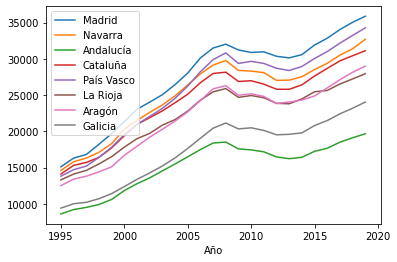

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
df.plot()
plt.show()

#### Ejercicio 4 [0.75 puntos]

La gráfica anterior muestra la renta per cápita en valores absolutos. Sin embargo, a menudo es más útil comparar incrementos relativos. Por ejemplo si una comunidad pasa de una renta de 10000 a 10100 al año siguiente, podemos decir que hay tenido un incremento proporcional de (10100-10000)/10000. Vamos a obtener estos incrementos proporcionales.

1.-  Obtener las diferencias entre cada dos filas consecutivas, esto es, el incremento de año en año para eso podemos utilizar el método diff():

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

el resultado podemos almacenarlo en un nuevo data frame dfdiff. Es importante notar que la primera fila, la correspondiente al primer año, es ahora NaN, porque no hay año anterior con el que hacer la diferencia 

2.- Calcular la proporción que representa el incremento en dfdiff con respecto al valor correspondiente en df. En particular, lo que debemos hacer para cada fila i de dfdiff desde la 1 (la 0 es la de laos NaNs) hasta la n-1 es obtener el resultado de dividir esta fila i por la fila i-1 de df. Es decir, dividimos el incremento obtenido cada año con respecto al valor del año, obteniendo la *proporción de incremento* .


Vamos completar el código paso a paso

1.- Cálculo de dfdiff

In [9]:
# solución 

# Calculamos la diferencia de cada fila con su anterior.
dfdiff = df.diff()

# Mostramos el DataFrame.
dfdiff

,Madrid,Navarra,Andalucía,Cataluña,País Vasco,La Rioja,Aragón,Galicia
Año,,,,,,,,
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,1200.0,1200.0,600.0,1200.0,900.0,800.0,900.0,600.0
1997,500.0,500.0,300.0,400.0,500.0,500.0,400.0,200.0
1998,1400.0,800.0,400.0,700.0,1200.0,900.0,600.0,500.0
1999,1500.0,1200.0,700.0,1300.0,1400.0,1000.0,700.0,700.0
2000,1633.0,1987.0,1223.0,1683.0,1742.0,1313.0,1592.0,972.0
2001,1716.0,1219.0,941.0,1570.0,1392.0,1172.0,1242.0,1001.0
2002,974.0,1105.0,810.0,924.0,1117.0,720.0,1259.0,883.0
2003,1030.0,1022.0,963.0,941.0,1114.0,1146.0,1089.0,959.0


2.- Cálculo de dfinc

In [10]:
# solución

# Creamos una copia profunda de dfdiff.
dfinc = dfdiff.copy()

# Calculamos las filas y las columnas.
rows = len(dfinc.index)
columns = len(dfinc.columns)

# Calculamos el porcentaje de incremento.
for row in range(1,rows):
    for column in range(columns):
        dfinc.iloc[row,column] = dfdiff.iloc[row,column] / df.iloc[row-1,column]

Depende de como lo hayamos hecho, pueden quedar filas nulas al principio y/o al final de `dfinc` Quitarlas, si es el caso.

In [11]:
# Solución

# Borramos la primera fila (año 1995) ya que esta lleno de valores NaN.
dfinc = dfinc.drop([1995])

# Mostramos el DataFrame.
dfinc

,Madrid,Navarra,Andalucía,Cataluña,País Vasco,La Rioja,Aragón,Galicia
Año,,,,,,,,
1996,0.079470,0.082192,0.069767,0.085106,0.065217,0.060150,0.072000,0.063830
1997,0.030675,0.031646,0.032609,0.026144,0.034014,0.035461,0.029851,0.020000
1998,0.083333,0.049080,0.042105,0.044586,0.078947,0.061644,0.043478,0.049020
1999,0.082418,0.070175,0.070707,0.079268,0.085366,0.064516,0.048611,0.065421
2000,0.082893,0.108579,0.115377,0.095085,0.097865,0.079576,0.105430,0.085263
2001,0.080439,0.060088,0.079591,0.080999,0.071231,0.065795,0.074407,0.080909
2002,0.042258,0.051381,0.063460,0.044099,0.053358,0.037925,0.070202,0.066029
2003,0.042876,0.045199,0.070944,0.043013,0.050519,0.058158,0.056739,0.067270
2004,0.055323,0.053231,0.065626,0.049084,0.059357,0.036641,0.055369,0.073086


Mostramos el resultado, que será del estilo

![](https://raw.githubusercontent.com/RafaelCaballero/tdm/master/images/pibinc.png)

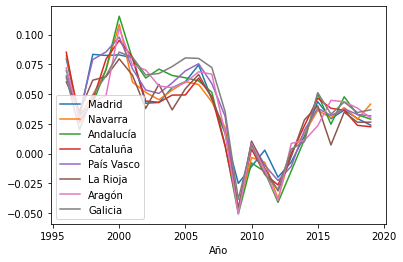

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

dfinc.plot()
plt.show()



**Test estadísticos**

La última gráfica ya parece más difícil de interpretar, está todo demasiado junto. Sí se ven tendencias globales como la crisis de 2007, pero es difícil sacar resultados comparativos. Podemos probar a ver las medias de dfinc con el método mean():

In [13]:
dfinc.mean()

Madrid        0.037245
Navarra       0.034741
Andalucía     0.035814
Cataluña      0.034102
País Vasco    0.039240
La Rioja      0.031901
Aragón        0.036309
Galicia       0.040503
dtype: float64

y las desviaciones típicas con sd()

In [14]:
dfinc.std()

Madrid        0.033762
Navarra       0.035252
Andalucía     0.040441
Cataluña      0.035194
País Vasco    0.036049
La Rioja      0.032053
Aragón        0.036668
Galicia       0.036183
dtype: float64

Sin embargo, la duda persiste: ¿estas diferencias son realmente significativas? 



Por ejemplo, si tenemos 2 monedas, M1 y M2, y las tiramos 2 veces, y M1 sale las dos veces cara y M2 dos veces cruz ¿podemos asegurar que las monedas son diferentes, con una "cargada" hacia la cara y la otra hacia la cruz? La respuesta es que no, son demasiadas pocas tiradas. Sin embargo, si repetimos el resultado un millón de veces y sigue saliendo muchas más caras en una y muchas más cruces en la otra, empezaremos a sospechar que hay algo diferente. 

En general, si queremos asegurar si las medias obtenidas son diferentes de manera significativa, debemos usar un test estadístico, como la t-Student o el [test de Welch](https://en.wikipedia.org/wiki/Welch%27s_t-test), que es el que utilizaremos aquí porque es válido para muestras con diferentes varianzas, que parece ser el caso. 

La *hipótesis nula* de este test es que las dos poblaciones (comunidades en nuestro caso) tienen la misma media. La hipótesis nula se rechaza si se obtiene un valor del estadístico p<0.05, lo que significa que diremos que es altamente improbable que la media sea diferente debido al azar (menos de un 5% de probabilidad). En otras palabras, diremos que las dos comunidades tienen medias diferentes si al hacer el test se obtiene p<0.05.

Veamos un ejemplo en Python

In [15]:
from scipy.stats import ttest_ind
import pandas as pd

# nuestras columnas
A = list(range(100))
B = list(range(5,105))

# un dataframe con estas dos columnas
dfAB = pd.DataFrame({'A': A, 'B': B})

# el test, nótese el equal_var = False
(estadistico,p) = ttest_ind(dfAB.A, dfAB.B, equal_var = False)
print("Ejemplo 1, no podemos descartar que la media sea la misma: ",p)


# nuestras columnas
A = list(range(100))
B = list(range(15,115))

# un dataframe con estas dos columnas
dfAB = pd.DataFrame({'A': A, 'B': B})

# el test, nótese el equal_var = False
(estadistico,p) = ttest_ind(dfAB.A, dfAB.B, equal_var = False)
print("Ejemplo 2, medias diferentes: ",p)


Ejemplo 1, no podemos descartar que la media sea la misma:  0.22442071600176872
Ejemplo 2, medias diferentes:  0.0003282202230043784


cuanto menor sea el valor p más probable será que las medias sean diferentes.

#### Ejercicio 5 [2 puntos]

Escribir código para mostrar qué parejas de comunidades tienen menor valor de p en el dataframe de incrementos proporcionales (`dfinc`). Recordar que las comunidades están en el array `comunidades`. Además, de las comunidades, mostrar su media y el valor de p.

Nota: por si sirve para el valor inicial, p está siempre entre 0 y 1 (es una probabilidad)

In [16]:
# solución

ranking = list()

numComunidades = len(comunidades)

# Matriz para evitar comparaciones simetricas y así obtener las combinaciones.
matrizSimetrica = [ [False for column in range(numComunidades)] for row in range(numComunidades) ]

# Ninguna comunidad se compara con ella misma.
for diagonal in range(numComunidades):
    matrizSimetrica[diagonal][diagonal] = True

# Introducimos los datos en el ranking (sin ordenar).
for row in range(numComunidades):
    for column in range(numComunidades):
        if not matrizSimetrica[row][column]:
            matrizSimetrica[row][column] = True
            matrizSimetrica[column][row] = True
            comunidadA = comunidades[row]
            comunidadB = comunidades[column]
            datosComunidadA = dfinc[comunidadA]
            datosComunidadB = dfinc[comunidadB]
            (estadistico, p) = ttest_ind(datosComunidadA, datosComunidadB, equal_var = False)
            ranking.append((comunidadA, datosComunidadA.mean(), datosComunidadA.std(), comunidadB, datosComunidadB.mean(), datosComunidadB.std(), p))

# Ordenamos por la columna del valor p.
ranking.sort(key=lambda tupla : tupla[6])

# Mostramos las comunidades que tienen el menor valor de p.
if len(ranking) > 0:
    print(ranking[0])

# Las medias de incrementos no son significativamente diferentes ya que para todo par de comunidades p >= 0.05
# Las medias tienden a comportarse de forma similar ya que son el reflejo de toda la economía del país y por tanto no hay un azar por el que unas comunidades estén mejor que otras.

('La Rioja', 0.03190073863793257, 0.032053175491275704, 'Galicia', 0.040503332995730355, 0.036182686100369316, 0.38788174503450334)


Desde un punto de vista estadístico, ¿podemos asegurar que estas comunidades tienen una media de incrementos significativamente  diferente? (sí o no, y por qué, una frase debe bastar)

#### Ejercicio 6 [0.25 puntos]
Ahora vamos a relacionar la renta per capita (dataframe df) con el nivel de desempleo en cara comunidad. Por desgracia, para el caso del paro solo disponemos de datos entre 2002 y 2019.

Completar el siguiente código para cargar en el dataframe `dfparo` los datos de la url `parourl`.

In [17]:
import pandas as pd
parourl = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv"

# Solucion

# Descargamos el archivo CSV y creamos a partir de el un DataFrame.
dfparo = pd.read_csv(parourl, encoding= 'unicode_escape')

# Mostramos el DataFrame.
dfparo

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
1,Andalucía,2018,21.26
2,Andalucía,2017,24.43
3,Andalucía,2016,28.25
4,Andalucía,2015,29.83
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


#### Ejercicio 7 [0.75 puntos]

Para cada comunidad de la lista "comunidades" haremos lo siguiente:

* Extraeremos de dfinc sus datos de renta per capita entre 2002 y 2018, ambos incluidos
* Extraemos de dfparo los datos de paro de esa comunidad para esos mismos años. Ojo: deben quedar en el mismo orden que en df, de menor a mayor, quizás haya que utilizar [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
* Calculamos y mostramos la correlación entre ambos valores. Para ayudarse se puede servir del siguiente ejemplo:

In [18]:
# Ejemplo de correlación
import numpy as np
a1 = [1,2,4]
a2 = [3,4,5]
np.corrcoef(a1,a2)

array([[1.        , 0.98198051],
       [0.98198051, 1.        ]])

En nuestro caso solo queremos mostrar la correlación, no la matriz entera, es decir algo del estilo

     Madrid: -0.76....
     Navarra: ....
     .....

In [19]:
# solución

paroDeComunidad = dict()

# Extraemos de dfinc todos los datos de los incrementos de la renta de las comunidades en el periodo 2002 - 2018.
dfincAux = dfinc.loc[ 2002:2018 , : ]

for comunidad in dfincAux.columns:

    # Extraemos de dfparo los datos de cada comunidad de dfinc en el periodo 2002 - 2018.
    dfparoRows = dfparo.loc[ (dfparo['Comunidad'] == comunidad) & (dfparo['Periodo'] >= 2002) & (dfparo['Periodo'] <= 2018) ]
    
    # Ordenamos datos de la comunidad por Año (Periodo) de menor a mayor.
    dfparoRows.sort_values(by=['Periodo'], inplace=True)

    # Guardamos los datos de paro a lo largo de 2002 - 2018 para la comunidad actual.
    paroDeComunidad[comunidad] = dfparoRows['Total'].tolist()


# Creamos un DataFrame con los datos de paro de todas las comunidades en el periodo 2002 - 2018.
paroDeComunidad['Año'] = list(range(2002,2019))
paroDeComunidades = pd.DataFrame(paroDeComunidad)
paroDeComunidades.set_index('Año', inplace=True)

# Calculamos el la correlación entre el porcentaje de incremento y la cantidad de paro de una comunidad.
for comunidad in dfincAux.columns:
    print(comunidad)
    print(np.corrcoef(dfincAux[comunidad], paroDeComunidades[comunidad]), end="\n\n")

Madrid
[[ 1.         -0.77258567]
 [-0.77258567  1.        ]]

Navarra
[[ 1.         -0.72760348]
 [-0.72760348  1.        ]]

Andalucía
[[ 1.         -0.73411928]
 [-0.73411928  1.        ]]

Cataluña
[[ 1.         -0.73367835]
 [-0.73367835  1.        ]]

País Vasco
[[ 1.         -0.73312902]
 [-0.73312902  1.        ]]

La Rioja
[[ 1.         -0.70684986]
 [-0.70684986  1.        ]]

Aragón
[[ 1.         -0.77138536]
 [-0.77138536  1.        ]]

Galicia
[[ 1.         -0.66112906]
 [-0.66112906  1.        ]]



#### Ejercicio 8 [2 puntos]
Volver a extraer los datos de incremento de renta y de paro, pero solo para Madrid, y hacer un gráfico (indagar en plt.plot) que muestre la relación entre los años y el paro y entre los años y el incremento de crecimiento. Es decir, deben aparecer las dos gráficas en la misma figura, las dos con valoes X entre 2002 y 2018

Para lograr que la escala no desvirtue la relación, convertir ambos conjuntos de datos a escala [0,1], de forma que la y varíe entre estos 2 valores en ambas gráficas. Para ello pudemos utilizar  `sklearn.preprocessing.minmax_scale` como en este ejemplo

In [20]:
from sklearn.preprocessing import minmax_scale
a = [1,2,3,4,5,10,12]
a_escalado = minmax_scale(a)
a_escalado

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.81818182, 1.        ])

<AxesSubplot:>

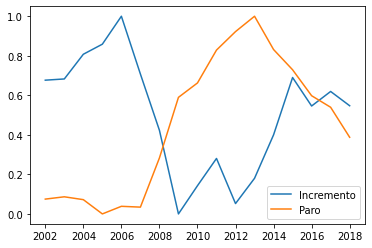

In [21]:
from sklearn.preprocessing import minmax_scale

#solución

# Extraemos de dfparo los datos de cada comunidad de Madrid en el periodo 2002 - 2018.
dfparoRows = dfparo.loc[ (dfparo['Comunidad'] == 'Madrid') & (dfparo['Periodo'] >= 2002) & (dfparo['Periodo'] <= 2018) ]

# Ordenamos datos de la comunidad por Año (Periodo) de menor a mayor.
dfparoRows.sort_values(by=['Periodo'], inplace=True)

# Establecemos el índice del DataFrame.
dfparoRows.set_index('Periodo', inplace=True)

# Obtenemos los incrementos porcentuales de la renta para el periodo 2002 - 2018.
dfincRows = dfinc.loc[ 2002:2018 , : ]

# Creamos el DataFrame.
dfRentaParo = pd.DataFrame({'Incremento': minmax_scale(dfincRows['Madrid'].tolist()), 'Paro': minmax_scale(dfparoRows['Total']).tolist()}, index=list(range(2002,2019)))

# Dibujamos el DataFrame.
dfRentaParo.plot()

In [22]:
browser.close()

Al acabar subir el fichero practica1.ipynb al campus virtual. No olvidar poner el nombre arriba del todo